In [1]:
import openpmd_api
import seaborn as sns
from os.path import join
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
import fdrot

In [2]:
base_path = '/bigdata/hplsim/scratch/ordyna35/runs/'
sim = '08_FoilLCT_new_geometry_preplasma_400nm_long'
inner_path = 'simOutput/h5/'
section_spc = 'simData_%T.h5'

In [3]:
path = join(base_path, sim)
path = join(path, inner_path)
full_path = join(path, section_spc)

In [4]:
! ls $path

simData_0.h5	  simData_14000.h5  simData_20000.h5  simData_7000.h5
simData_10000.h5  simData_15000.h5  simData_2000.h5   simData_8000.h5
simData_1000.h5   simData_16000.h5  simData_3000.h5   simData_9000.h5
simData_11000.h5  simData_17000.h5  simData_4000.h5
simData_12000.h5  simData_18000.h5  simData_5000.h5
simData_13000.h5  simData_19000.h5  simData_6000.h5


In [5]:
series = openpmd_api.Series(full_path, openpmd_api.Access_Type.read_only)

Obtain rotation:

In [ ]:
files = fdrot.sim_data.

In [7]:
Bx=series.iterations[4500].meshes['B']['x']
n_e = series.iterations[4500].meshes['e_density']['\x0bScalar']

In [73]:
Bx_data= Bx.load_chunk()
n_e_data = n_e.load_chunk()
series.flush()

In [205]:
product = n_e_data  * Bx_data
product_slice = product[:,170,:]
v_max = max([abs(np.min(rotation)), abs(np.max(rotation))])
norm = mpl.colors.Normalize(vmin=-v_max, vmax=v_max)
product_slice = product[:,90:170,:]

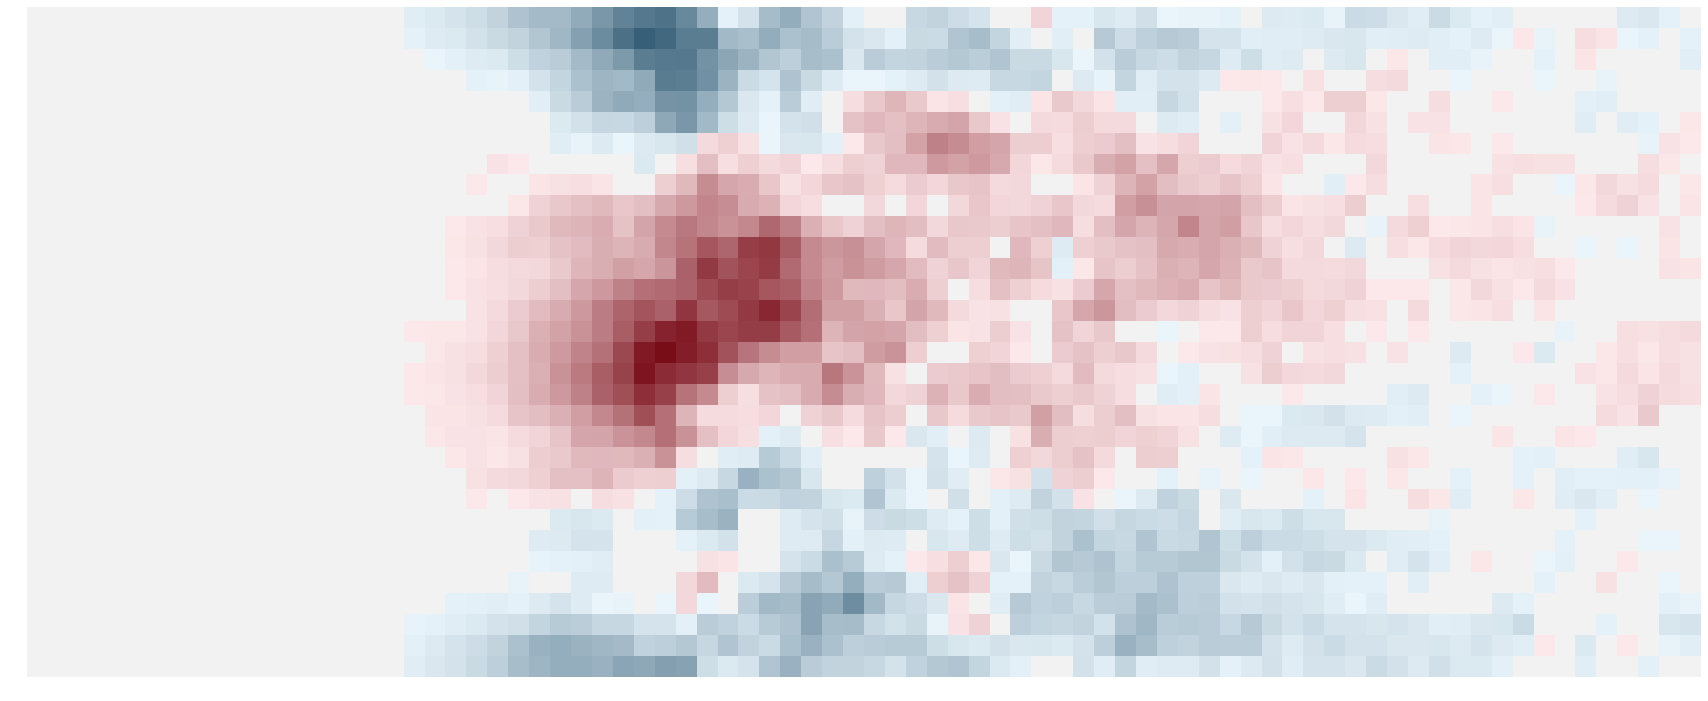

In [206]:
f, ax = plt.subplots(1, figsize=(30,15))
plt.axis('off')
cmap = sns.diverging_palette(240, 10, s=90, l=25, n=250 ,
                                          center = 'light',
                                          as_cmap=True)
#v_max = max([abs(np.min(product_slice)), abs(np.max(product_slice))])
ax.imshow(rotation,cmap=cmap, norm=norm )
#f.colorbar(ax.images[0], ax=ax)
#f.savefig("left.png",  )

In [207]:
a = ax.images[0]
a.write_png('rotation.png')

In [208]:
image = skimage.io.imread("rotation.png")
image_resized  = skimage.transform.resize(image, (10, 25))

/home/pawel/anaconda3/envs/fdrot/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/pawel/anaconda3/envs/fdrot/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


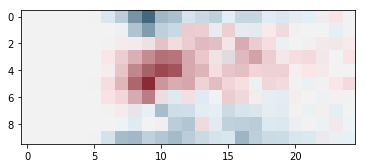

In [209]:
f, ax = plt.subplots(1)
ax.imshow(image_resized)
ax.images[0].write_png('rotation_scaled.png')

In [202]:
rotation = np.sum(product_slice, axis=2)

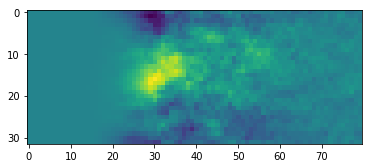

In [203]:
plt.imshow(rotation)